### INTERACTION DIVIDED INTO 3 TIME WINDOWS: 40 S IN THE CAGE + 2 x 60 S IN THE ARMS 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn
from collections import OrderedDict
import matplotlib.ticker as plticker

In [2]:
excel_file = pd.read_excel('behavior_alldata.xlsx')
excel_file.head()

,file,human,group,order,hands on the cage_n,hands on the cage_d,hands on the cage_l,exploration_n,exploration_d,exploration_l,...,hide together_l,wait_n,wait_d,wait_l,freeze_n,freeze_d,freeze_l,rat interaction_n,rat interaction_d,rat interaction_l
0,AH_contr_rat1_timewindows.bvs,AH,CONTR,1,0,0,0,2,5870,22790,...,0,0,0,0,0,0,0,0,0,0
1,AH_contr_rat2_timewindows.bvs,AH,CONTR,2,0,0,0,1,10350,34190,...,77430,5,36760,92160,0,0,0,0,0,0
2,AH_exp_rat1_timewindows.bvs,AH,EXP,1,0,0,0,0,0,0,...,0,2,11780,150880,0,0,0,0,0,0
3,AH_exp_rat2_timewindows.bvs,AH,EXP,2,0,0,0,1,16140,34410,...,0,1,12500,64880,0,0,0,0,0,0
4,AK_exp_rat1_timewindows.bvs,AK,EXP,1,0,0,0,1,18080,35930,...,0,2,4940,154320,0,0,0,0,0,0


In [3]:
# remove RP_exp files due to incomplete recordings

excel_file = excel_file.drop(excel_file[excel_file.file == '_RP_exp_rat1_timewindows.bvs'].index)
excel_file = excel_file.drop(excel_file[excel_file.file == '_RP_exp_rat2_timewindows.bvs'].index)

excel_file.head()

,file,human,group,order,hands on the cage_n,hands on the cage_d,hands on the cage_l,exploration_n,exploration_d,exploration_l,...,hide together_l,wait_n,wait_d,wait_l,freeze_n,freeze_d,freeze_l,rat interaction_n,rat interaction_d,rat interaction_l
0,AH_contr_rat1_timewindows.bvs,AH,CONTR,1,0,0,0,2,5870,22790,...,0,0,0,0,0,0,0,0,0,0
1,AH_contr_rat2_timewindows.bvs,AH,CONTR,2,0,0,0,1,10350,34190,...,77430,5,36760,92160,0,0,0,0,0,0
2,AH_exp_rat1_timewindows.bvs,AH,EXP,1,0,0,0,0,0,0,...,0,2,11780,150880,0,0,0,0,0,0
3,AH_exp_rat2_timewindows.bvs,AH,EXP,2,0,0,0,1,16140,34410,...,0,1,12500,64880,0,0,0,0,0,0
4,AK_exp_rat1_timewindows.bvs,AK,EXP,1,0,0,0,1,18080,35930,...,0,2,4940,154320,0,0,0,0,0,0


In [4]:
df = excel_file.loc[:, (excel_file.columns.str.endswith('human')) | (excel_file.columns.str.endswith('group')) | 
                    (excel_file.columns.str.endswith('order')) | (excel_file.columns.str.endswith('_n')) | 
                    (excel_file.columns.str.endswith('_d'))]
df.head()

,human,group,order,hands on the cage_n,hands on the cage_d,exploration_n,exploration_d,approach_n,approach_d,human-exploration-0_n,...,human-exploration-2_n,human-exploration-2_d,hide together_n,hide together_d,wait_n,wait_d,freeze_n,freeze_d,rat interaction_n,rat interaction_d
0,AH,CONTR,1,0,0,2,5870,1,2920,1,...,1,5440,0,0,0,0,0,0,0,0
1,AH,CONTR,2,0,0,1,10350,0,0,0,...,1,26000,2,22900,5,36760,0,0,0,0
2,AH,EXP,1,0,0,0,0,1,11590,1,...,4,38100,0,0,2,11780,0,0,0,0
3,AH,EXP,2,0,0,1,16140,1,5390,1,...,3,7260,0,0,1,12500,0,0,0,0
4,AK,EXP,1,0,0,1,18080,1,800,1,...,3,45040,0,0,2,4940,0,0,0,0


In [5]:
# create a table for anova calculation

humans = ['AH', 'AK', 'KG', 'KL', 'KT', 'AG', 'RF', 'RP', 'TJ']
groups = ['EXP', 'CONTR']
orders = ['1', '2']
behaviors = ['exploration_d', 'human-exploration-0_d', 'human-exploration-1_d', 'armpit-hide-1_d', 'human-exploration-2_d', 
             'armpit-hide-2_d', 'wait_d']

df_anova = pd.DataFrame()

df.order = df.order.astype(str)

for human in humans:
    for order in orders:

        x_exp = df[(df.group.str.contains('EXP') & df.human.str.contains(human) & df.order.str.contains(order))]
        x_contr = df[(df.group.str.contains('CONTR') & df.human.str.contains(human) & df.order.str.contains(order))]
                
        value_exp_exploration = next(iter(x_exp['exploration_d'].values/1000), None)
        value_contr_exploration = next(iter(x_contr['exploration_d'].values/1000), None)
            
        value_exp_human_exploration0 = next(iter(x_exp['human-exploration-0_d'].values/1000), None)
        value_contr_human_exploration0 = next(iter(x_contr['human-exploration-0_d'].values/1000), None)
            
        value_exp_human_exploration1 = next(iter(x_exp['human-exploration-1_d'].values/1000), None)
        value_contr_human_exploration1 = next(iter(x_contr['human-exploration-1_d'].values/1000), None)
        
        value_exp_armpit_hide1 = next(iter(x_exp['armpit-hide-1_d'].values/1000), None)
        value_contr_armpit_hide1 = next(iter(x_contr['armpit-hide-1_d'].values/1000), None)
        
        value_exp_human_exploration2 = next(iter(x_exp['human-exploration-2_d'].values/1000), None)
        value_contr_human_exploration2 = next(iter(x_contr['human-exploration-2_d'].values/1000), None)
        
        value_exp_armpit_hide2 = next(iter(x_exp['armpit-hide-2_d'].values/1000), None)
        value_contr_armpit_hide2 = next(iter(x_contr['armpit-hide-2_d'].values/1000), None)
        
        value_exp_wait = next(iter(x_exp['wait_d'].values/1000), None)
        value_contr_wait = next(iter(x_contr['wait_d'].values/1000), None)
        

        data=OrderedDict({'Code': human, 'Order': order, 'Duration_exploration_exp': value_exp_exploration,
                          'Duration_human-exploration-0_exp': value_exp_human_exploration0,
                         'Duration_human-exploration-1_exp': value_exp_human_exploration1,
                          'Duration_armpit-hide-1_exp': value_exp_armpit_hide1,
                          'Duration_human-exploration-2_exp': value_exp_human_exploration2,
                         'Duration_armpit-hide-2_exp': value_exp_armpit_hide2,
                        'Duration_wait_exp': value_exp_wait,
                          
                          'Duration_exploration_contr': value_contr_exploration,
                         'Duration_human-exploration-0_contr': value_contr_human_exploration0,
                         'Duration_human-exploration-1_contr': value_contr_human_exploration1,
                          'Duration_armpit-hide-1_contr': value_contr_armpit_hide1,
                         'Duration_human-exploration-2_contr': value_contr_human_exploration2,
                          'Duration_armpit-hide-2_contr': value_contr_armpit_hide2,
                          'Duration_wait_contr': value_contr_wait})
        df_temporary = pd.DataFrame([data])
        df_anova = df_anova.append(df_temporary)
        df_anova = df_anova.fillna(np.nan)

df_anova.to_csv('eksport_tabelek/durations_timewindows.csv')
df_anova.to_excel('eksport_tabelek/durations_timewindows.xlsx')

df_anova.fillna(0)
df_anova.head()

/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_711/2208135322.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.order = df.order.astype(str)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_711/2208135322.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_anova = df_anova.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_711/2208135322.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_anova = df_anova.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_711/2208135322.py:57: Fu

,Code,Order,Duration_exploration_exp,Duration_human-exploration-0_exp,Duration_human-exploration-1_exp,Duration_armpit-hide-1_exp,Duration_human-exploration-2_exp,Duration_armpit-hide-2_exp,Duration_wait_exp,Duration_exploration_contr,Duration_human-exploration-0_contr,Duration_human-exploration-1_contr,Duration_armpit-hide-1_contr,Duration_human-exploration-2_contr,Duration_armpit-hide-2_contr,Duration_wait_contr
0,AH,1,0.00,1.92,22.09,37.39,38.10,9.51,11.78,5.87,6.35,11.13,37.19,5.44,53.65,0.00
0,AH,2,16.14,0.21,26.08,20.84,7.26,45.34,12.50,10.35,0.00,22.89,0.00,26.00,0.00,36.76
0,AK,1,18.08,2.98,40.88,18.19,45.04,9.41,4.94,5.14,1.52,31.88,27.80,23.24,26.80,9.36
0,AK,2,15.16,7.00,6.82,37.64,0.00,59.99,15.14,11.48,7.18,28.29,0.00,39.08,4.36,46.40
0,KG,1,28.05,0.00,6.95,0.00,48.39,0.00,51.14,18.47,4.96,39.43,0.00,0.21,59.68,19.87


In [6]:
# create df_plot based on df_anova

df_plot = pd.melt(df_anova, id_vars=['Code'], value_vars=['Duration_exploration_exp', 'Duration_human-exploration-0_exp', 
                                                          'Duration_human-exploration-1_exp',
                                                          'Duration_armpit-hide-1_exp', 'Duration_human-exploration-2_exp', 
                                                          'Duration_armpit-hide-2_exp', 'Duration_wait_exp', 
                                                    
                                                          
                                                          'Duration_exploration_contr', 'Duration_human-exploration-0_contr',
                                                          'Duration_human-exploration-1_contr',
                                                          'Duration_armpit-hide-1_contr', 'Duration_human-exploration-2_contr',  
                                                          'Duration_armpit-hide-2_contr', 'Duration_wait_contr']) 
                                                       

def behavior_from_row(row):
    return row['variable'].split('_')[-2]

def group_from_row(row):
    return row['variable'].split('_')[-1]
    
df_plot['Behavior'] = df_plot.apply(behavior_from_row, axis=1)

df_plot['Group'] = df_plot.apply(group_from_row, axis=1)

df_plot = df_plot.rename(columns={"value": "Duration"})
df_plot.head()

,Code,variable,Duration,Behavior,Group
0,AH,Duration_exploration_exp,0.00,exploration,exp
1,AH,Duration_exploration_exp,16.14,exploration,exp
2,AK,Duration_exploration_exp,18.08,exploration,exp
3,AK,Duration_exploration_exp,15.16,exploration,exp
4,KG,Duration_exploration_exp,28.05,exploration,exp


In [7]:
# delete "wait" behavior

df_plot = df_plot.loc[df_plot['Behavior'] != "wait"]
df_plot.head()

,Code,variable,Duration,Behavior,Group
0,AH,Duration_exploration_exp,0.00,exploration,exp
1,AH,Duration_exploration_exp,16.14,exploration,exp
2,AK,Duration_exploration_exp,18.08,exploration,exp
3,AK,Duration_exploration_exp,15.16,exploration,exp
4,KG,Duration_exploration_exp,28.05,exploration,exp


In [8]:
means = df_plot.groupby(['Group', 'Behavior']).mean()
means

/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_711/2540163427.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = df_plot.groupby(['Group', 'Behavior']).mean()


Duration
Group Behavior                      
contr armpit-hide-1         9.684444
      armpit-hide-2        17.918333
      exploration           6.838889
      human-exploration-0   6.942222
      human-exploration-1  32.645000
      human-exploration-2  28.242778
exp   armpit-hide-1        19.906667
      armpit-hide-2        19.713333
      exploration          12.273333
      human-exploration-0   1.420833
      human-exploration-1  23.722500
      human-exploration-2  29.155833

[2.679446837228788, 1.3533156786467708, 0.6177996859987888, 1.443083924372179, 4.712156124420019, 3.3626169829250863, 4.950803934308003, 3.6356360954372064, 5.4216927439311755, 4.564528253123835, 5.800986767330838, 5.526090301434446]


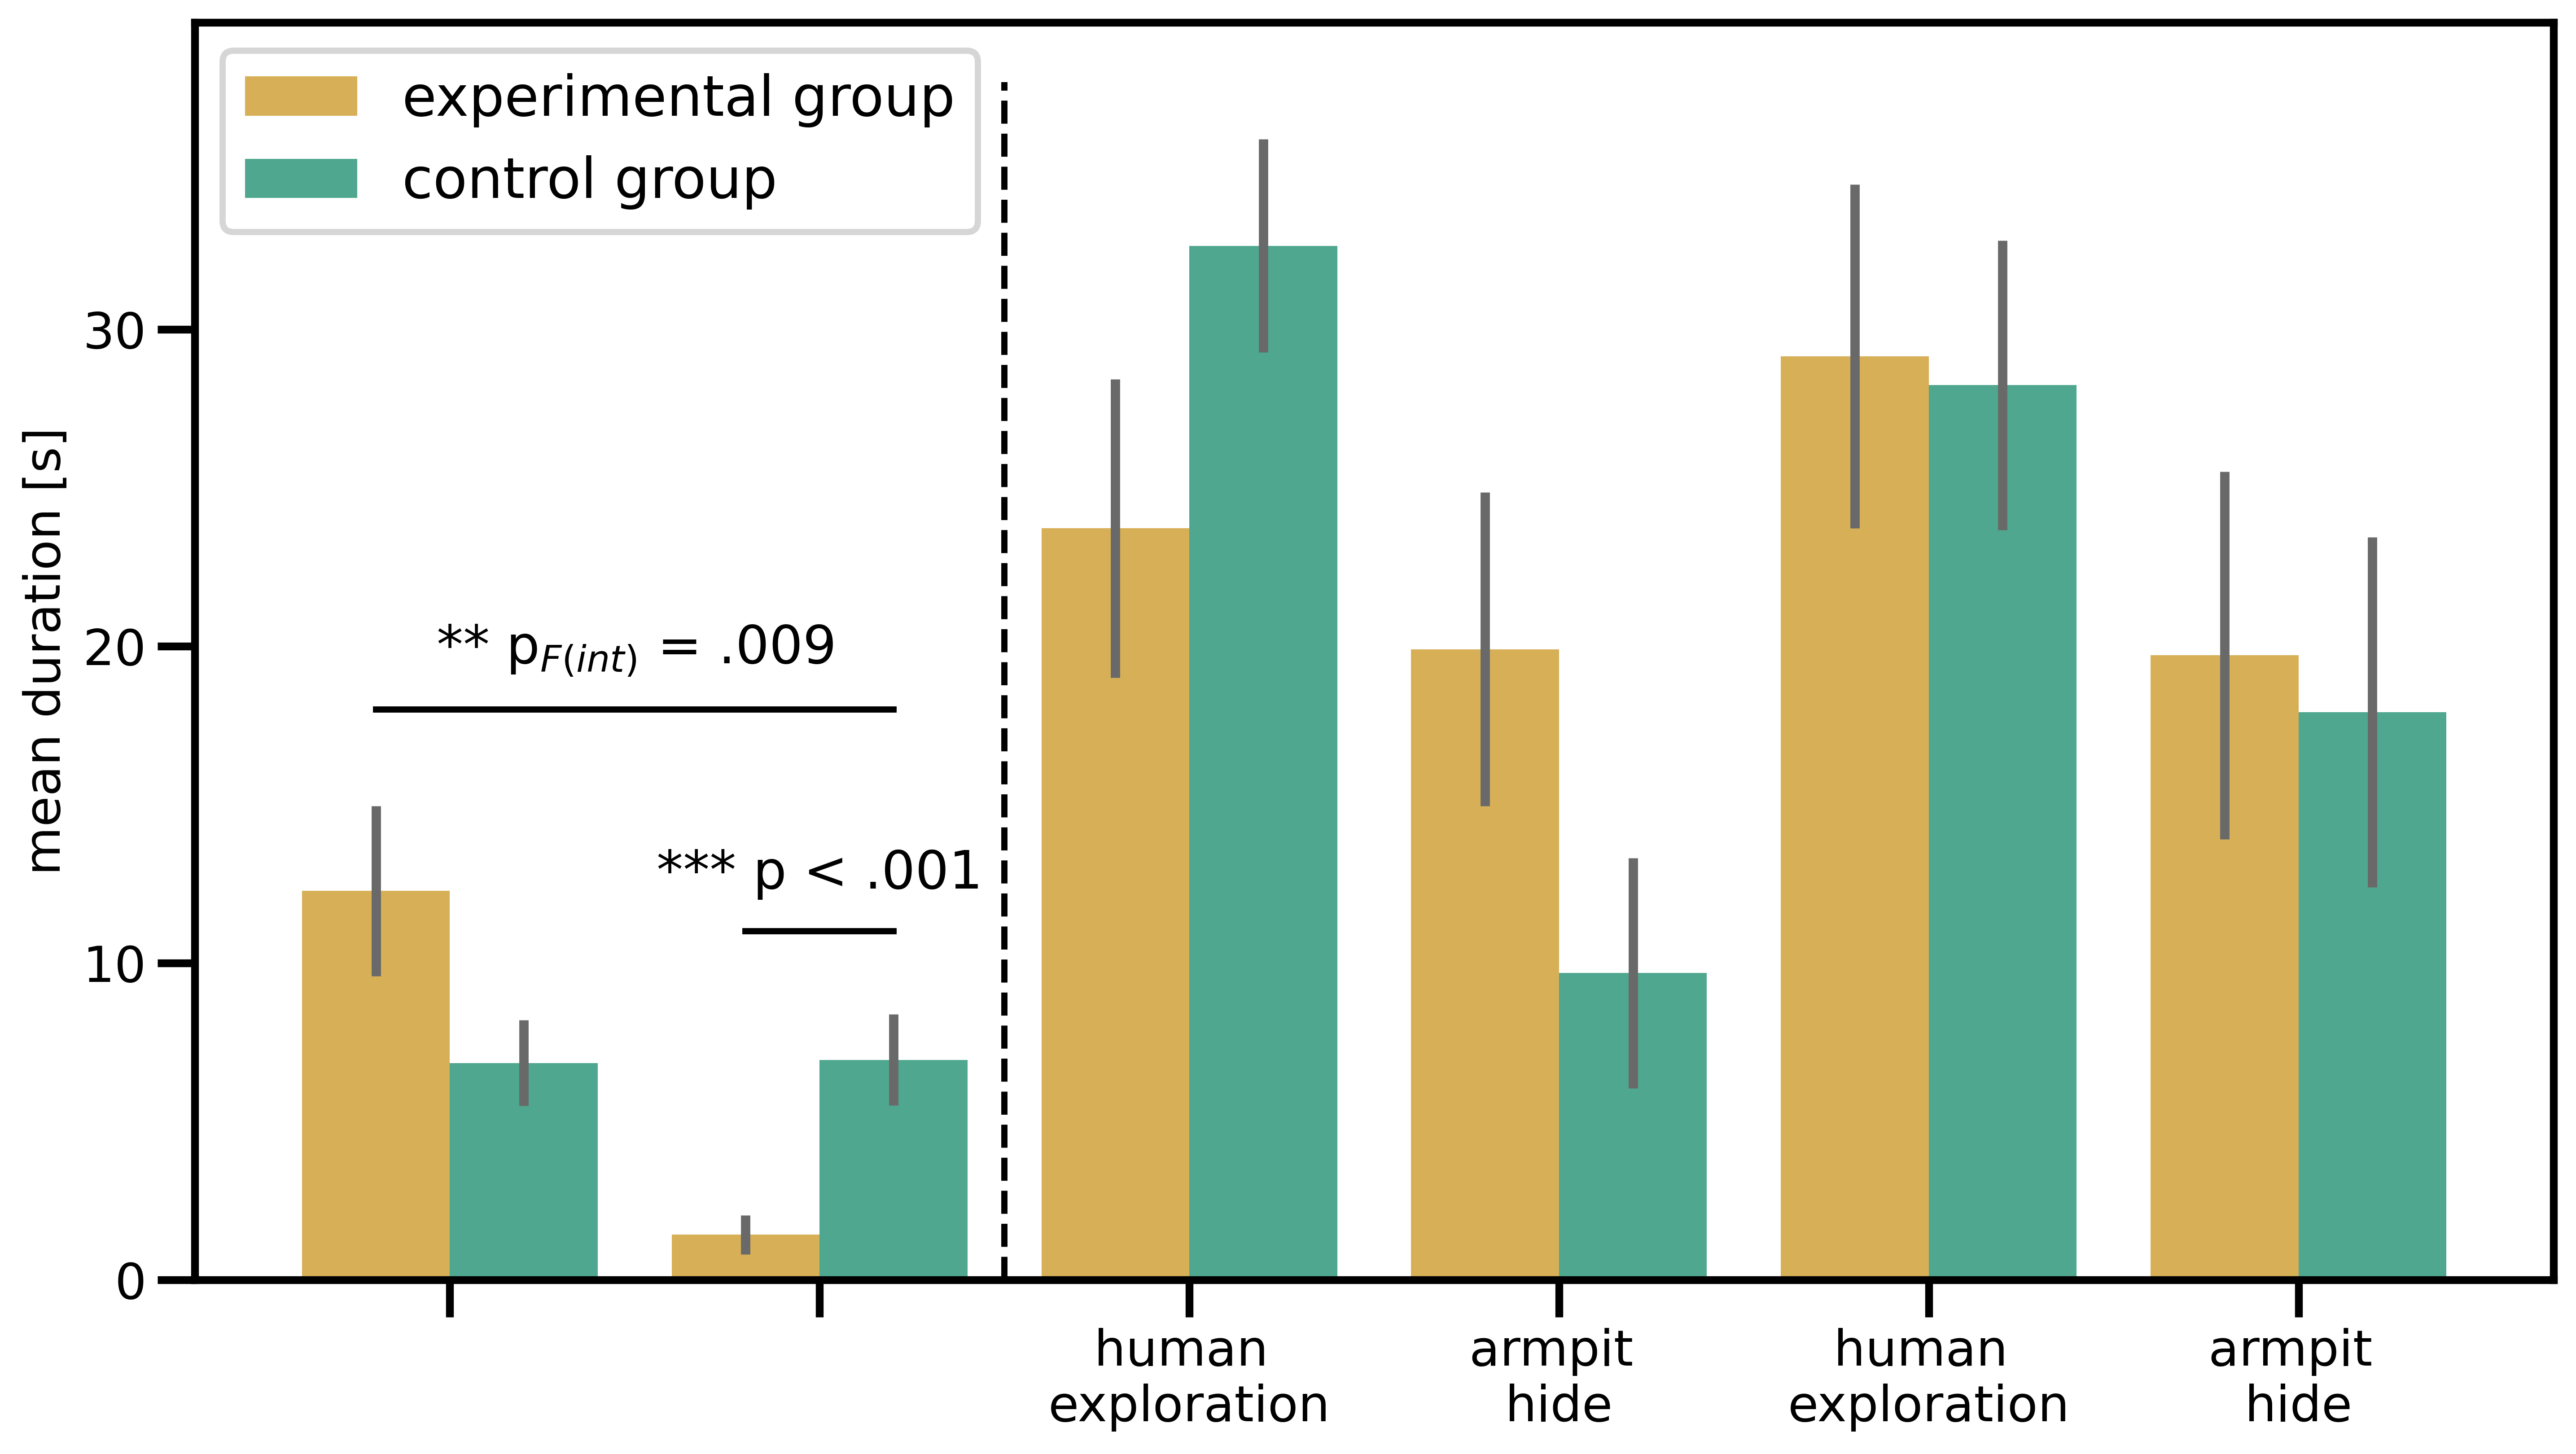

In [9]:
sem_data = df_plot.groupby(["Behavior", "Group"], sort=False)["Duration"].sem()
sem_data = sem_data.values

# we need a list of SEMs, in which values for EXP and CTRL will be interleaved (as the order of bars in the plot: EXP, CTRL, EXP, CTRL etc.)
# create list full of None, of a correct length
error_bars = [None]*len(sem_data)
# At even positions insert values from first half of sem_data list
error_bars[0:len(error_bars):2] = sem_data[0:(len(sem_data)//2)]
# At odd positions insert values from second half of sem_data list
error_bars[1:len(error_bars):2] = sem_data[(len(sem_data)//2):len(sem_data)]
print(error_bars)

plt.figure(figsize=(12, 7), dpi=500)
seaborn.set_context('poster')
#pal_1 = seaborn.color_palette(["#D41159", "#1A85FF"])
pal_1 = seaborn.color_palette(["#E69F00", "#009E73"])

ax = seaborn.barplot(x="Behavior", y="Duration", hue="Group", 
                     data=df_plot, palette=pal_1, alpha = 0.75, errorbar=None, errwidth=1)

# get x & height for each container going from left to right
n_containers = len(ax.containers)
n_bars = len(ax.containers[0])
x = []
h = []
for i in range(n_bars):
    for j in range(n_containers):
        x.append(ax.containers[j][i].get_x() + ax.containers[j][i].get_width()/2)
        h.append(ax.containers[j][i].get_height())

ax.errorbar(x, h, error_bars, fmt=' ', ecolor='dimgrey')

plt.legend(loc="upper left", labels=['experimental group','control group'], fontsize = 18)
plt.xlabel("")
plt.ylabel("mean duration [s]", fontsize=16)

labels = ["cage \nexploration", "human \nexploration", "human \nexploration", "armpit \nhide", "human \nexploration", 
          "armpit \nhide"]
plt.xticks(ticks = [0,1,2,3,4,5], labels = labels, fontsize=16)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start+0.69, end+0.69, 1))

plt.yticks(fontsize=16)
plt.yticks(np.arange (0,90,10))

plt.plot([-0.2,-0.2,1.2,1.2], [18,18,18,18], linewidth=2, color='k') # 0 i 1 to pierwsze dwa elementy na osi x; 12 to wartość osi y
plt.text((-0.2+1.2)*.5, 18+1, "** p$_{F(int)}$ = .009", ha='center', va='bottom', color='k', fontsize=17)

plt.plot([0.8,0.8,1.2,1.2], [11,11,11,11], linewidth=2, color='k') # 0 i 1 to pierwsze dwa elementy na osi x; 20 to wartość osi y
plt.text((0.8+1.2)*.5, 11+1, "*** p < .001", ha='center', va='bottom', color='k', fontsize=17)

ymin, ymax = ax.get_ylim()
plt.vlines(x=1.5, ymin=ymin, ymax=ymax, colors='k', linestyles='--', linewidth=2)

plt.tight_layout()
plt.savefig('wykresy/timewindows_mean_durations_allbehaviors.tiff')
plt.show()

In [10]:
sem_data = df_plot.groupby(["Behavior", "Group"], sort=False)["Duration"].sem()
print(sem_data)
sem_data = sem_data.values
sem_data

# we need a list of SEMs, in which values for EXP and CTRL will be interleaved (as the order of bars in the plot: EXP, CTRL, EXP, CTRL etc.)
# create list full of None, of a correct length
error_bars = [None]*len(sem_data)
# At even positions insert values from first half of sem_data list
error_bars[0:len(error_bars):2] = sem_data[0:(len(sem_data)//2)]
# At odd positions insert values from second half of sem_data list
error_bars[1:len(error_bars):2] = sem_data[(len(sem_data)//2):len(sem_data)]
print(error_bars)

Behavior             Group
exploration          exp      2.679447
human-exploration-0  exp      0.617800
human-exploration-1  exp      4.712156
armpit-hide-1        exp      4.950804
human-exploration-2  exp      5.421693
armpit-hide-2        exp      5.800987
exploration          contr    1.353316
human-exploration-0  contr    1.443084
human-exploration-1  contr    3.362617
armpit-hide-1        contr    3.635636
human-exploration-2  contr    4.564528
armpit-hide-2        contr    5.526090
Name: Duration, dtype: float64
[2.679446837228788, 1.3533156786467708, 0.6177996859987888, 1.443083924372179, 4.712156124420019, 3.3626169829250863, 4.950803934308003, 3.6356360954372064, 5.4216927439311755, 4.564528253123835, 5.800986767330838, 5.526090301434446]


In [11]:
error_bars_cage = error_bars[0:4]
error_bars_arms = error_bars[4:]

In [12]:
df_cage_phase = df_plot[(df_plot['Behavior'] == 'exploration') | (df_plot['Behavior'] == 'human-exploration-0')]
df_cage_phase

,Code,variable,Duration,Behavior,Group
0,AH,Duration_exploration_exp,0.00,exploration,exp
1,AH,Duration_exploration_exp,16.14,exploration,exp
2,AK,Duration_exploration_exp,18.08,exploration,exp
3,AK,Duration_exploration_exp,15.16,exploration,exp
4,KG,Duration_exploration_exp,28.05,exploration,exp
...,...,...,...,...,...
157,RF,Duration_human-exploration-0_contr,0.00,human-exploration-0,contr
158,RP,Duration_human-exploration-0_contr,14.47,human-exploration-0,contr
159,RP,Duration_human-exploration-0_contr,2.19,human-exploration-0,contr
160,TJ,Duration_human-exploration-0_contr,5.21,human-exploration-0,contr


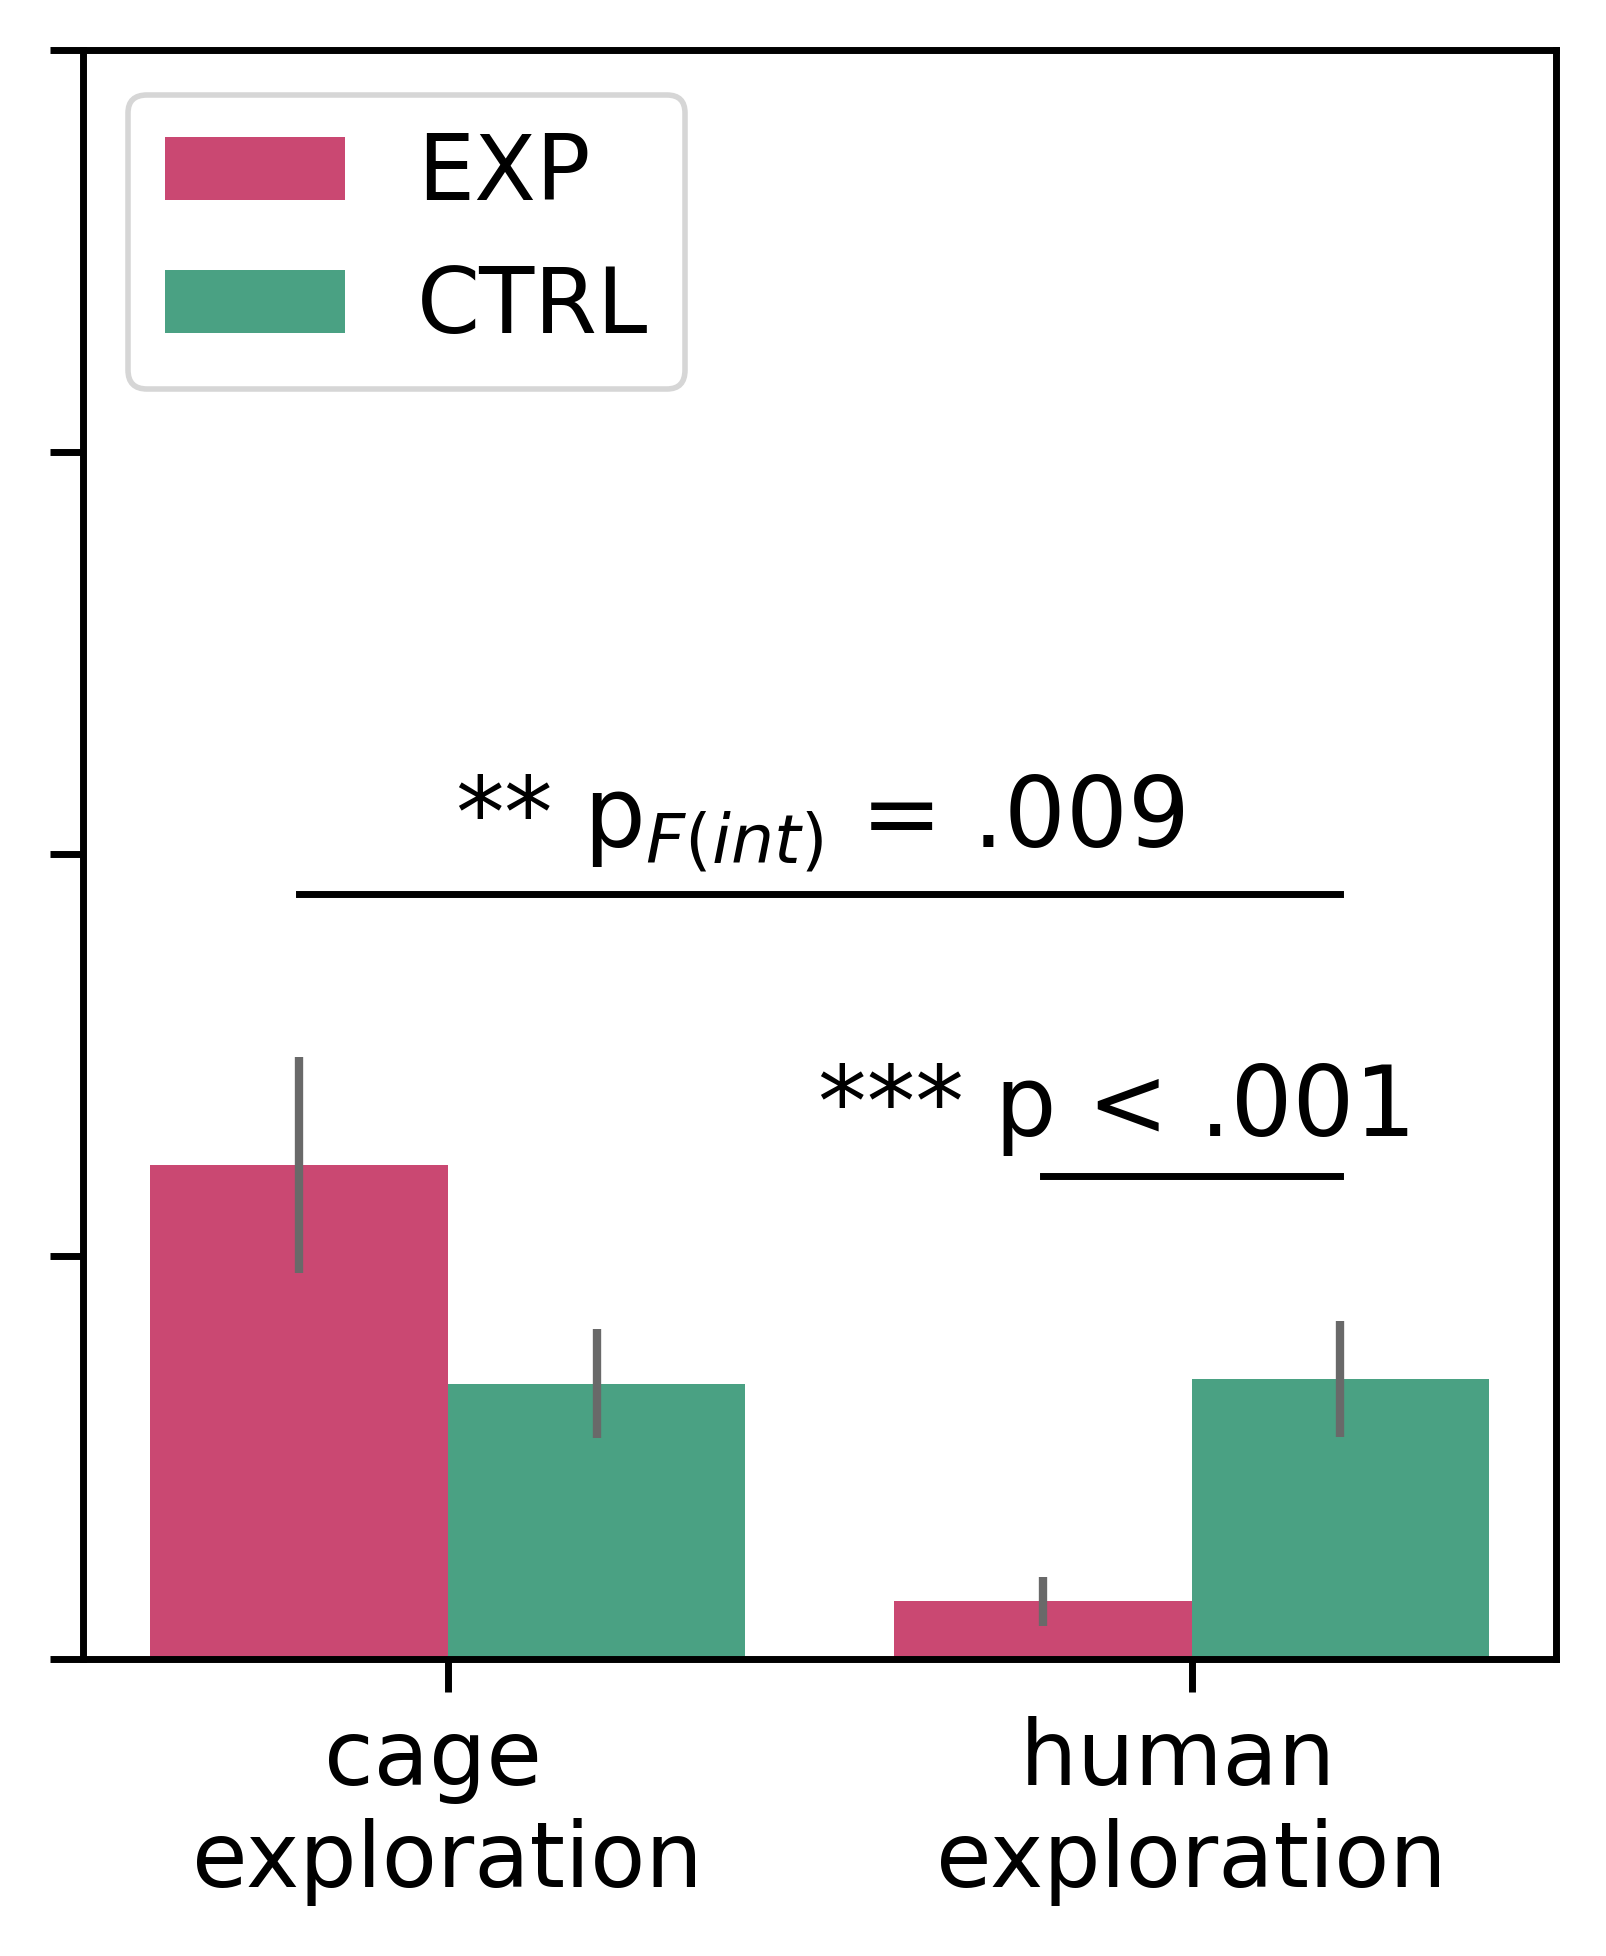

In [13]:
# plot cage behaviors only

plt.figure(figsize=(3.3, 4), dpi=500)
seaborn.set_context('paper')
pal_1 = seaborn.color_palette(['#E0326A', "#3BAF87"])

ax = seaborn.barplot(data=df_cage_phase, x="Behavior", y="Duration", hue="Group", palette=pal_1, errwidth=1, errorbar=None,)

# get x & height for each container going from left to right
n_containers = len(ax.containers)
n_bars = len(ax.containers[0])
x = []
h = []
for i in range(n_bars):
    for j in range(n_containers):
        x.append(ax.containers[j][i].get_x() + ax.containers[j][i].get_width()/2)
        h.append(ax.containers[j][i].get_height())

ax.errorbar(x, h, error_bars_cage, fmt=' ', ecolor='dimgray')

plt.legend(loc="upper left", labels=['EXP','CTRL'], fontsize = 13)
plt.xlabel("")
plt.ylabel("")

labels = ["cage \nexploration", "human \nexploration"]
plt.xticks(ticks=[0,1],labels=labels, fontsize=13)

plt.yticks(fontsize=13)

plt.plot([-0.2,-0.2,1.2,1.2], [19,19,19,19], linewidth=1, color='k') # 0 i 1 to pierwsze dwa elementy na osi x; 12 to wartość osi y
plt.text((-0.2+1.2)*.5, 19+0.5, "** p$_{F(int)}$ = .009", ha='center', va='bottom', color='k', fontsize=14)

plt.plot([0.8,0.8,1.2,1.2], [12,12,12,12], linewidth=1, color='k') # 0 i 1 to pierwsze dwa elementy na osi x; 20 to wartość osi y
plt.text((0.8+1.2)*.45, 12+0.5, "*** p < .001", ha='center', va='bottom', color='k', fontsize=14)

plt.yticks(np.arange (0,45,10))
ax.set(yticklabels=[])

plt.tight_layout()
plt.savefig('wykresy/timewindows_mean_durations_cage.tiff')
plt.show()

In [14]:
df_arms_phase = df_plot[(df_plot['Behavior'] != 'exploration') & (df_plot['Behavior'] != 'human-exploration-0')]
df_arms_phase

,Code,variable,Duration,Behavior,Group
36,AH,Duration_human-exploration-1_exp,22.09,human-exploration-1,exp
37,AH,Duration_human-exploration-1_exp,26.08,human-exploration-1,exp
38,AK,Duration_human-exploration-1_exp,40.88,human-exploration-1,exp
39,AK,Duration_human-exploration-1_exp,6.82,human-exploration-1,exp
40,KG,Duration_human-exploration-1_exp,6.95,human-exploration-1,exp
...,...,...,...,...,...
229,RF,Duration_armpit-hide-2_contr,0.00,armpit-hide-2,contr
230,RP,Duration_armpit-hide-2_contr,0.00,armpit-hide-2,contr
231,RP,Duration_armpit-hide-2_contr,0.00,armpit-hide-2,contr
232,TJ,Duration_armpit-hide-2_contr,0.00,armpit-hide-2,contr


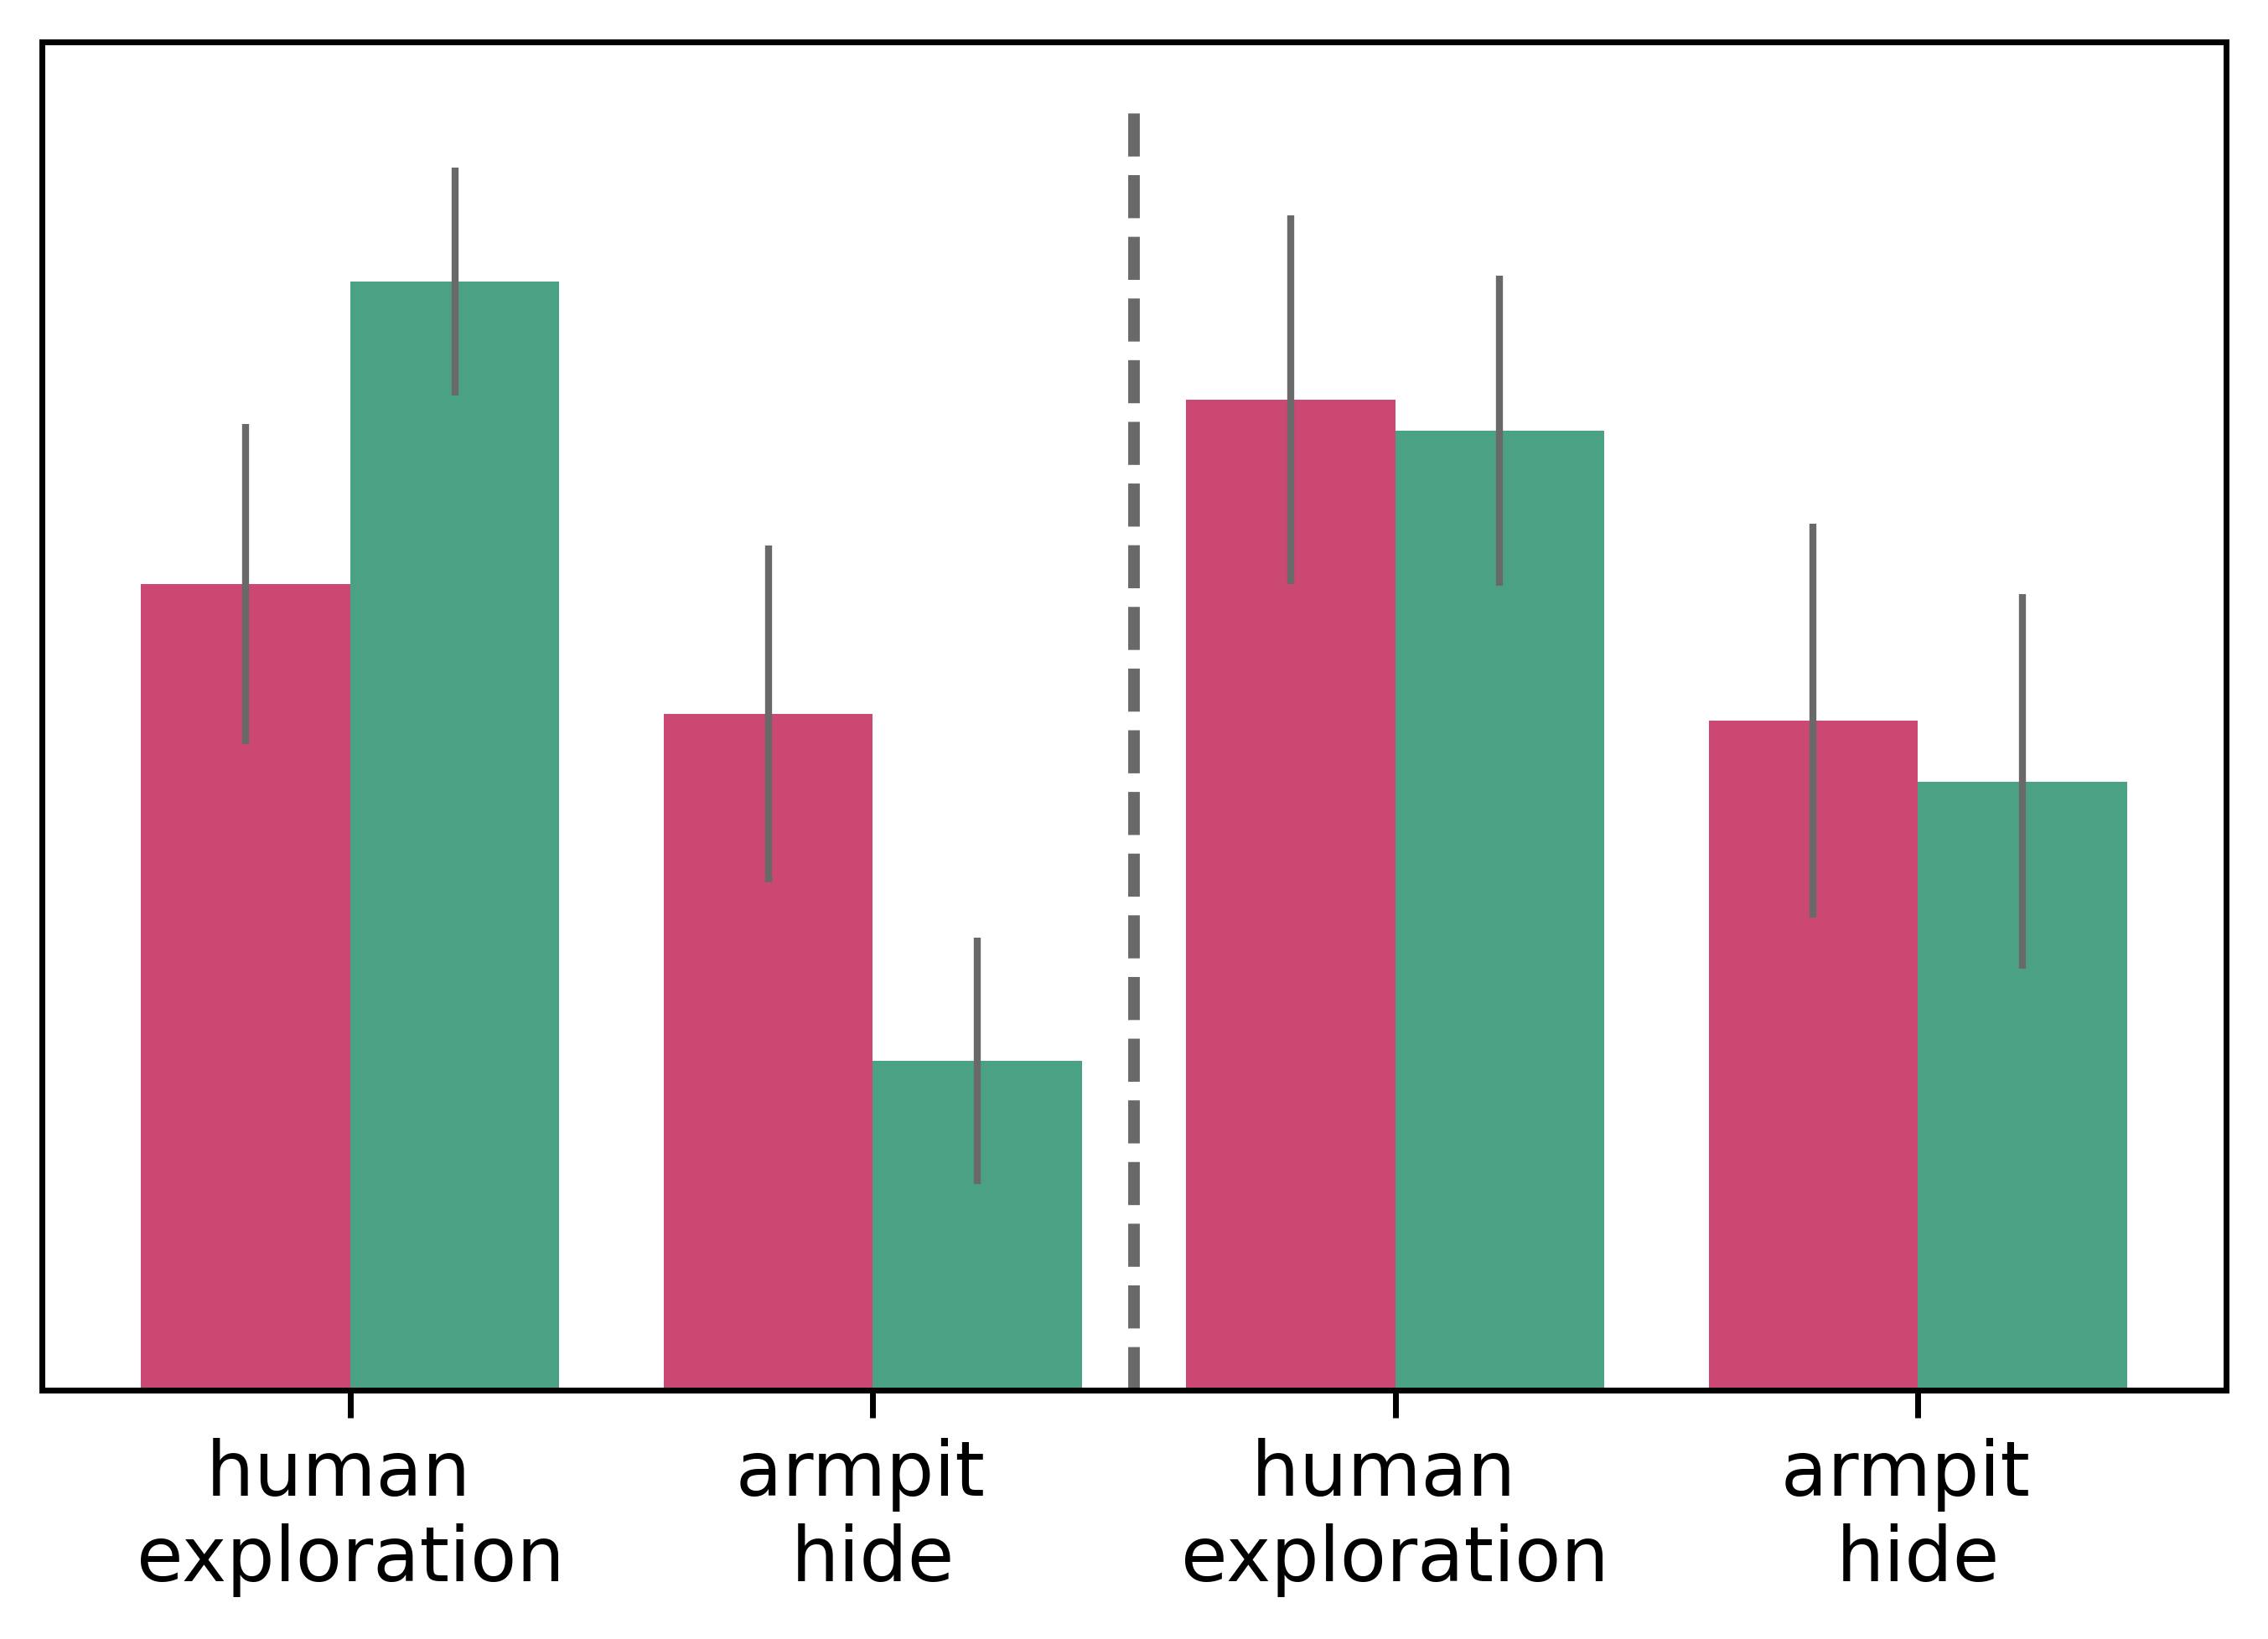

In [15]:
plt.figure(figsize=(5.5, 4), dpi=500)
seaborn.set_context('paper')
pal_1 = seaborn.color_palette(['#E0326A', "#3BAF87"])

ax = seaborn.barplot(x="Behavior", y="Duration", hue="Group", 
                     data=df_arms_phase, palette=pal_1, errorbar=None, errwidth=1)

# get x & height for each container going from left to right
n_containers = len(ax.containers)
n_bars = len(ax.containers[0])
x = []
h = []
for i in range(n_bars):
    for j in range(n_containers):
        x.append(ax.containers[j][i].get_x() + ax.containers[j][i].get_width()/2)
        h.append(ax.containers[j][i].get_height())

ax.errorbar(x, h, error_bars_arms, fmt=' ', ecolor='dimgray')

ax.get_legend().remove()
plt.xlabel("")
plt.ylabel("")

labels = ["human \nexploration", "armpit \nhide", "human \nexploration", "armpit \nhide"]
plt.xticks(ticks=[0,1,2,3], labels=labels, fontsize=13)

plt.yticks(np.arange (0,45,10))

ax.set(yticklabels=[])
ax.tick_params(left=False)

plt.vlines(x=1.5, ymin=ymin, ymax=ymax, colors='dimgray', linestyles='--', linewidth=2)

plt.tight_layout()
plt.savefig('wykresy/timewindows_mean_durations_arms.tiff')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 3000x1500 with 0 Axes>

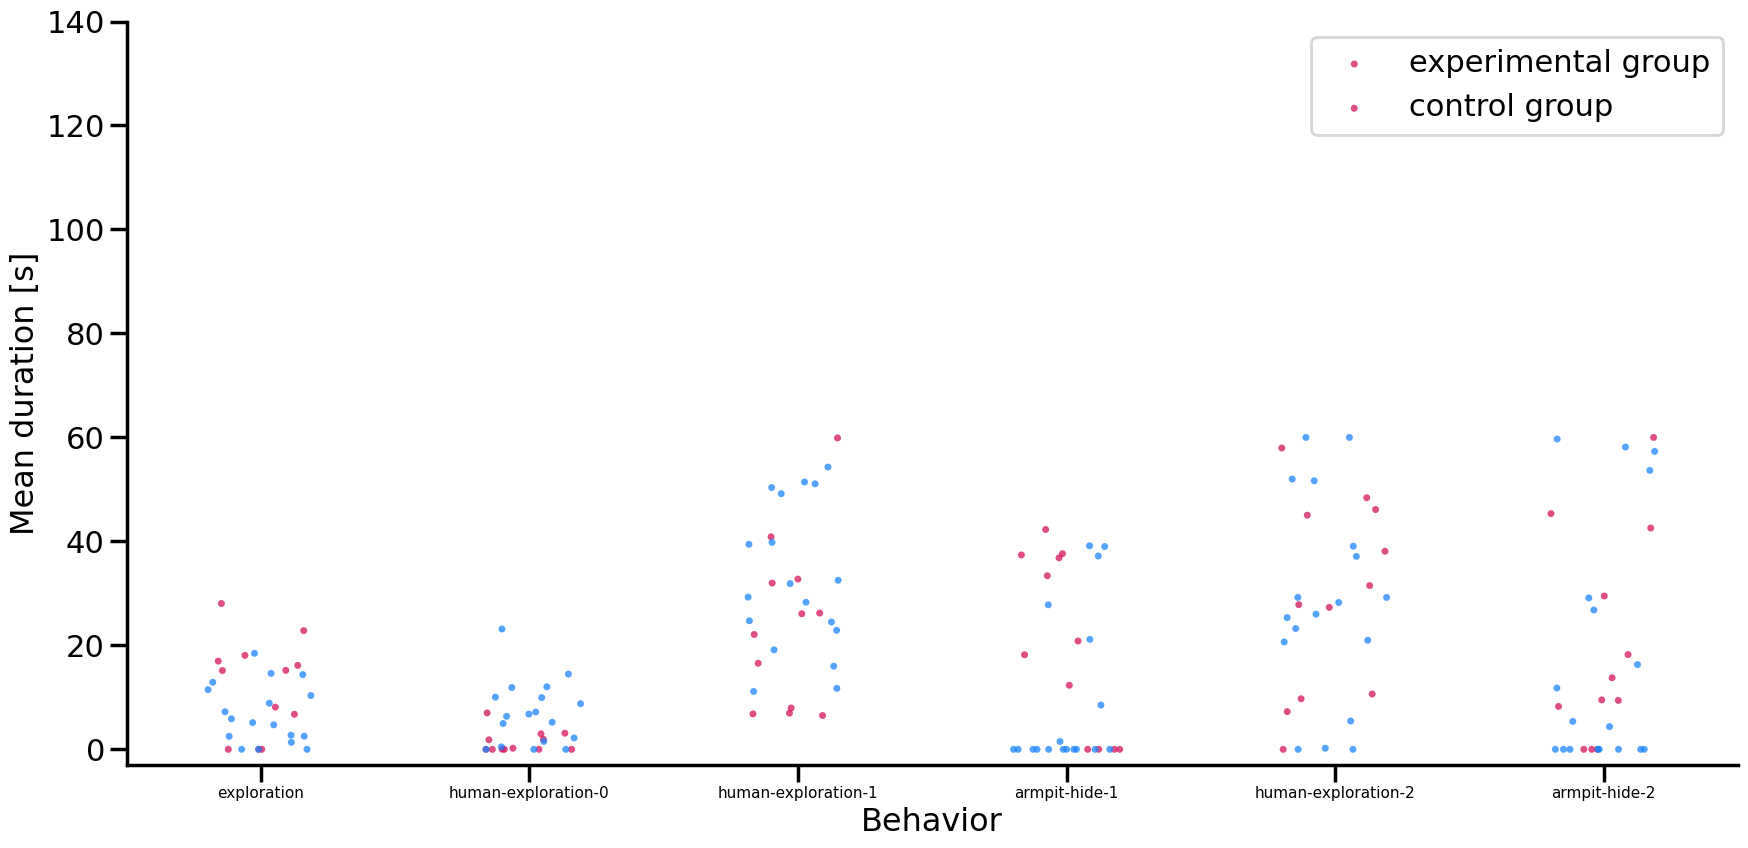

In [16]:
plt.figure(figsize=(30, 15))
seaborn.set_context('poster')
pal_1 = seaborn.color_palette(["#D41159", "#1A85FF"])

ax = seaborn.catplot(x='Behavior', y='Duration', hue='Group',
            data=df_plot, palette=pal_1, alpha = 0.75, jitter=0.2, height=9, aspect=2, legend=False)

plt.legend(loc="upper right", fontsize=22)
plt.legend(labels=['experimental group', 'control group'])
plt.xlabel("Behavior", fontsize=23)
plt.ylabel("Mean duration [s]", fontsize=23)
plt.xticks(fontsize=11)
plt.yticks(fontsize=22)
plt.yticks(np.arange (0,150,20))

plt.tight_layout()
plt.savefig('wykresy/timewindows_mean_durations_allbehaviors_stripplot.png')
plt.show()